In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/home/alex/Documents/estudo/alura/al-ml/ML_Classificacao_por_tras_dos_panos/Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
dados.shape

(7043, 18)

Tratamento dos dados, as variáveos binárias que estão em testo serão alteraras para 1 e 0 subistituindo os valores Sim e não respectivamente. 

In [4]:
# modificação de forma manual
traducao_dic = {
    'Sim': 1,
    'Nao': 0
}

dadosmodificados = dados[["Conjuge", "Dependentes", "TelefoneFixo", "PagamentoOnline", "Churn"]].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
# transformação pelo get_dimmies
dumie_dados = pd.get_dummies(dados.drop(["Conjuge", "Dependentes", "TelefoneFixo", "PagamentoOnline", "Churn"], axis=1))

#junção dos dados transformados com os dados que já tinhamos
dados_final = pd.concat([dadosmodificados, dumie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


In [6]:
# para poder ver todas as colunas utilizamos a função set_option
pd.set_option('display.max_columns', dados_final.shape[1]) #dados_final.shape[1] retorna o número de colunas no dataset
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


In [7]:
# MAria é uma nova cliente que estamos tentando enteder seu churn baseado nos dados históricos
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


Antes de continuar vamos balancear os dados para que nosso algoritmo não pensa pra uma solução onde na dúvida "chuta" para os dados com maior quantidade

/home/alex/.virtualenvs/alura/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/.virtualenvs/alura/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/.virtualenvs/alura/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


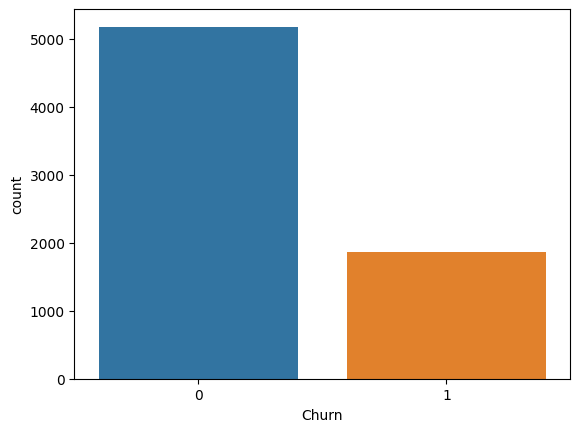

In [8]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [9]:
!pip install -U imbalanced-learn

In [10]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [11]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [12]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0


/home/alex/.virtualenvs/alura/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/.virtualenvs/alura/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/.virtualenvs/alura/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


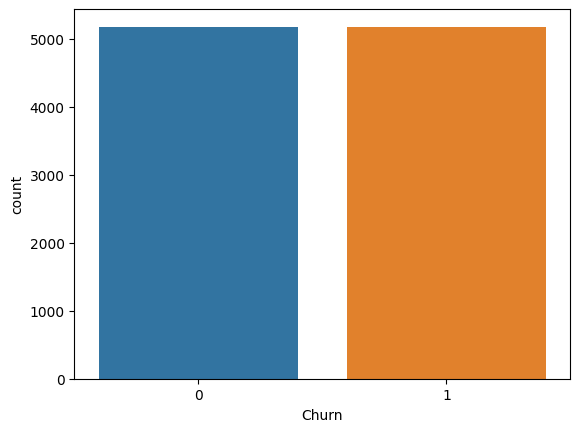

In [13]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

## Implementando o algoritmo KNN 

In [14]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [15]:
# Dividir em inputs e outputs
x = dados_final.drop("Churn", axis= 1)
y = dados_final["Churn"]

In [16]:
# Biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [17]:
norm = StandardScaler()

x_normalizado = norm.fit_transform(x)
x_normalizado

array([[ 1.26516933, -0.52756038, -3.06083934, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       ...,
       [-0.79040803, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.94892525,
        -0.54742438, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.94892525,
        -0.54742438, -0.5311508 ]])

In [18]:
x_normalizado[0]

array([ 1.26516933, -0.52756038, -3.06083934,  0.81449258, -0.41350409,
       -1.10772423, -1.32176271, -0.99614196,  3.06083934, -0.93558385,
        1.48315631, -1.05853285, -0.44850949,  0.77851405, -0.44850949,
       -0.59625062, -1.09729069, -0.44850949,  1.35121363,  0.91935908,
       -0.44850949, -0.73960631,  0.78557474, -0.44850949, -0.60652979,
        1.08919748, -0.44850949, -0.84605064,  1.10588699, -0.44850949,
       -0.85821499, -0.4605816 ,  0.68807296, -0.47286547, -0.50805069,
        1.05382378, -0.54742438, -0.5311508 ])

In [19]:
xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
xmaria_normalizado

array([[-0.79040803, -0.52756038,  0.32670777,  0.81449258, -0.41350409,
        -1.14938871, -0.97235545,  1.00387298, -0.32670777, -0.93558385,
        -0.67423777,  0.94470379, -0.44850949,  0.77851405, -0.44850949,
        -0.59625062, -1.09729069, -0.44850949,  1.35121363,  0.91935908,
         2.22960721, -0.73960631, -1.27295335,  2.22960721, -0.60652979,
         1.08919748, -0.44850949, -0.84605064, -0.90425153, -0.44850949,
         1.16520919, -0.4605816 , -1.45333425,  2.1147664 , -0.50805069,
        -0.94892525, -0.54742438,  1.88270449]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

In [22]:
# Biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

# instanciando o nodelo - por padrao são 5 vizinhos
Knn = KNeighborsClassifier(metric="euclidean", n_neighbors= 5)

In [23]:
# treino do modelo com os dados de treino
Knn.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [24]:
# teste do modelo com dados de teste
predito_knn = Knn.predict(x_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

## Implementando algoritmo Naive Bayes

In [25]:
# escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
import numpy as np

np.median(x_treino)

-0.44850949388572553

In [26]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.44)


In [27]:
bnb.fit(x_treino, y_treino)

BernoulliNB(binarize=0.44)

In [28]:
predito_bnb = bnb.predict(x_teste)

predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

## Implementando algoritmo decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

# instanciando modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [30]:
# treina o modelo
dtc.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
# verificar a importancia de cada atributo
dtc.feature_importances_

array([0.01867372, 0.01468806, 0.00294871, 0.01871264, 0.01615367,
       0.15411072, 0.20677741, 0.01242725, 0.00366737, 0.01230493,
       0.0004716 , 0.00556786, 0.        , 0.05344973, 0.        ,
       0.01663057, 0.01072682, 0.        , 0.00881073, 0.00837333,
       0.        , 0.01120458, 0.01507336, 0.        , 0.01468576,
       0.00625118, 0.        , 0.00503768, 0.00847386, 0.        ,
       0.01714986, 0.00893017, 0.23348935, 0.02804094, 0.01847597,
       0.0355377 , 0.01216391, 0.02099055])

In [32]:
# predição do modelo

predito_arvoredecisao = dtc.predict(x_teste)

predito_arvoredecisao

array([0, 0, 0, ..., 0, 1, 1])

## Validação e comparação dos modelos treinados 

### Matriz de confusão

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

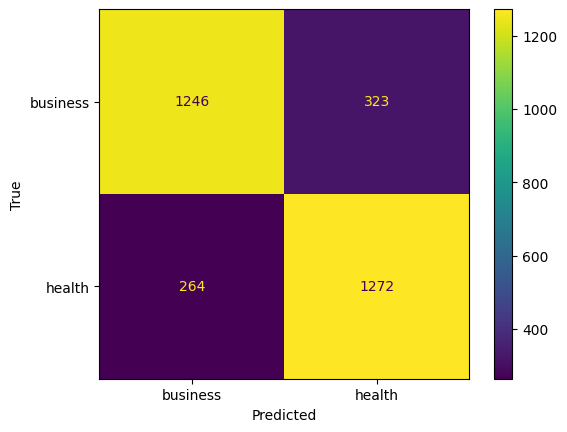

In [60]:
# resultado de KNN

cm_knn = confusion_matrix(y_teste, predito_knn)

cmd = ConfusionMatrixDisplay(cm_knn, display_labels=['business','health'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

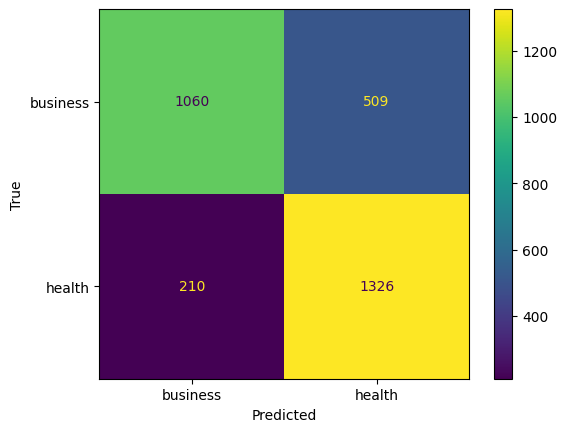

In [61]:
# resultado de Naive Base

cm_bnb = confusion_matrix(y_teste, predito_bnb)

cmd = ConfusionMatrixDisplay(cm_bnb, display_labels=['business','health'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

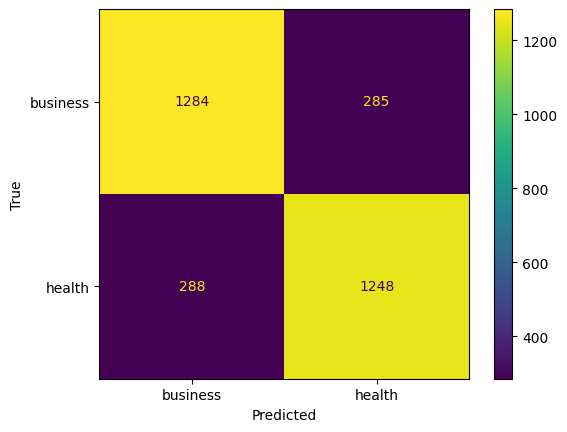

In [62]:
# resultado decision tree

cm_ad = confusion_matrix(y_teste, predito_arvoredecisao)

cmd = ConfusionMatrixDisplay(cm_ad, display_labels=['business','health'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

### Acurácia

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
# modelo Rnn
print(accuracy_score(y_teste, predito_knn))

0.8109500805152979


In [40]:
# modelo Naive Base
print(accuracy_score(y_teste, predito_bnb))

0.768438003220612


In [41]:
# modelo decision tree
print(accuracy_score(y_teste, predito_arvoredecisao))

0.8154589371980676


### Precisão

In [42]:
from sklearn.metrics import precision_score

In [43]:
# modelo Knn
print(precision_score(y_teste, predito_knn))

0.7974921630094044


In [44]:
# modelo Naive Base
print(precision_score(y_teste, predito_bnb))

0.7226158038147139


In [45]:
# modelo decision tree
print(precision_score(y_teste, predito_arvoredecisao))

0.8140900195694716


### Recall

In [46]:
from sklearn.metrics import recall_score

In [47]:
# modelo Knn
print(recall_score(y_teste, predito_knn))

0.828125


In [48]:
# modelo Naive Base
print(recall_score(y_teste, predito_bnb))

0.86328125


In [49]:
# modelo Decision tree
print(recall_score(y_teste, predito_arvoredecisao))

0.8125


### F1-score

In [57]:
from sklearn.metrics import f1_score

In [53]:
# modelo Knn
print(f1_score(y_teste, predito_knn))

0.8125199616735869


In [54]:
# modelo Naive Base
print(f1_score(y_teste, predito_bnb))

0.7867101750222486


In [55]:
# modelo Decision tree
print(f1_score(y_teste, predito_arvoredecisao))

0.8132942326490713


In [56]:
from sklearn.metrics import roc_curve

### Ativiade
Vamos supor que temos um conjunto de informações de pacientes com suspeita de sarampo. Para auxiliar o(a) médico(a) na tomada de decisão sobre o diagnóstico, aplicamos um modelo de classificação e obtemos os seguintes resultados:

Diagnóstico predito = [0,0,0,0,1,1,1,1,0,1,0,1] 
Diagnóstico real = [1,1,0,0,1,1,1,0,1,0,1,0] 
Sabendo que o valor 1 representa caso confirmado de sarampo e o valor 0 não é um caso de sarampo, calcule o desempenho deste modelo de classificação usando as métricas Recall e f1-score. Em seguida, selecione a resposta com os respectivos valores:

In [65]:
predito = [0,0,0,0,1,1,1,1,0,1,0,1]
real = [1,1,0,0,1,1,1,0,1,0,1,0]

In [67]:
atividade_f1 = f1_score(real, predito)
atividade_recall = recall_score(real, predito)

print(f'Valor de F1-Score {atividade_f1}')
print(f'Valor de Recall {atividade_recall}')

Valor de F1-Score 0.4615384615384615
Valor de Recall 0.42857142857142855
